### Необходимые библиотеки

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
from datetime import timedelta

###Схемы


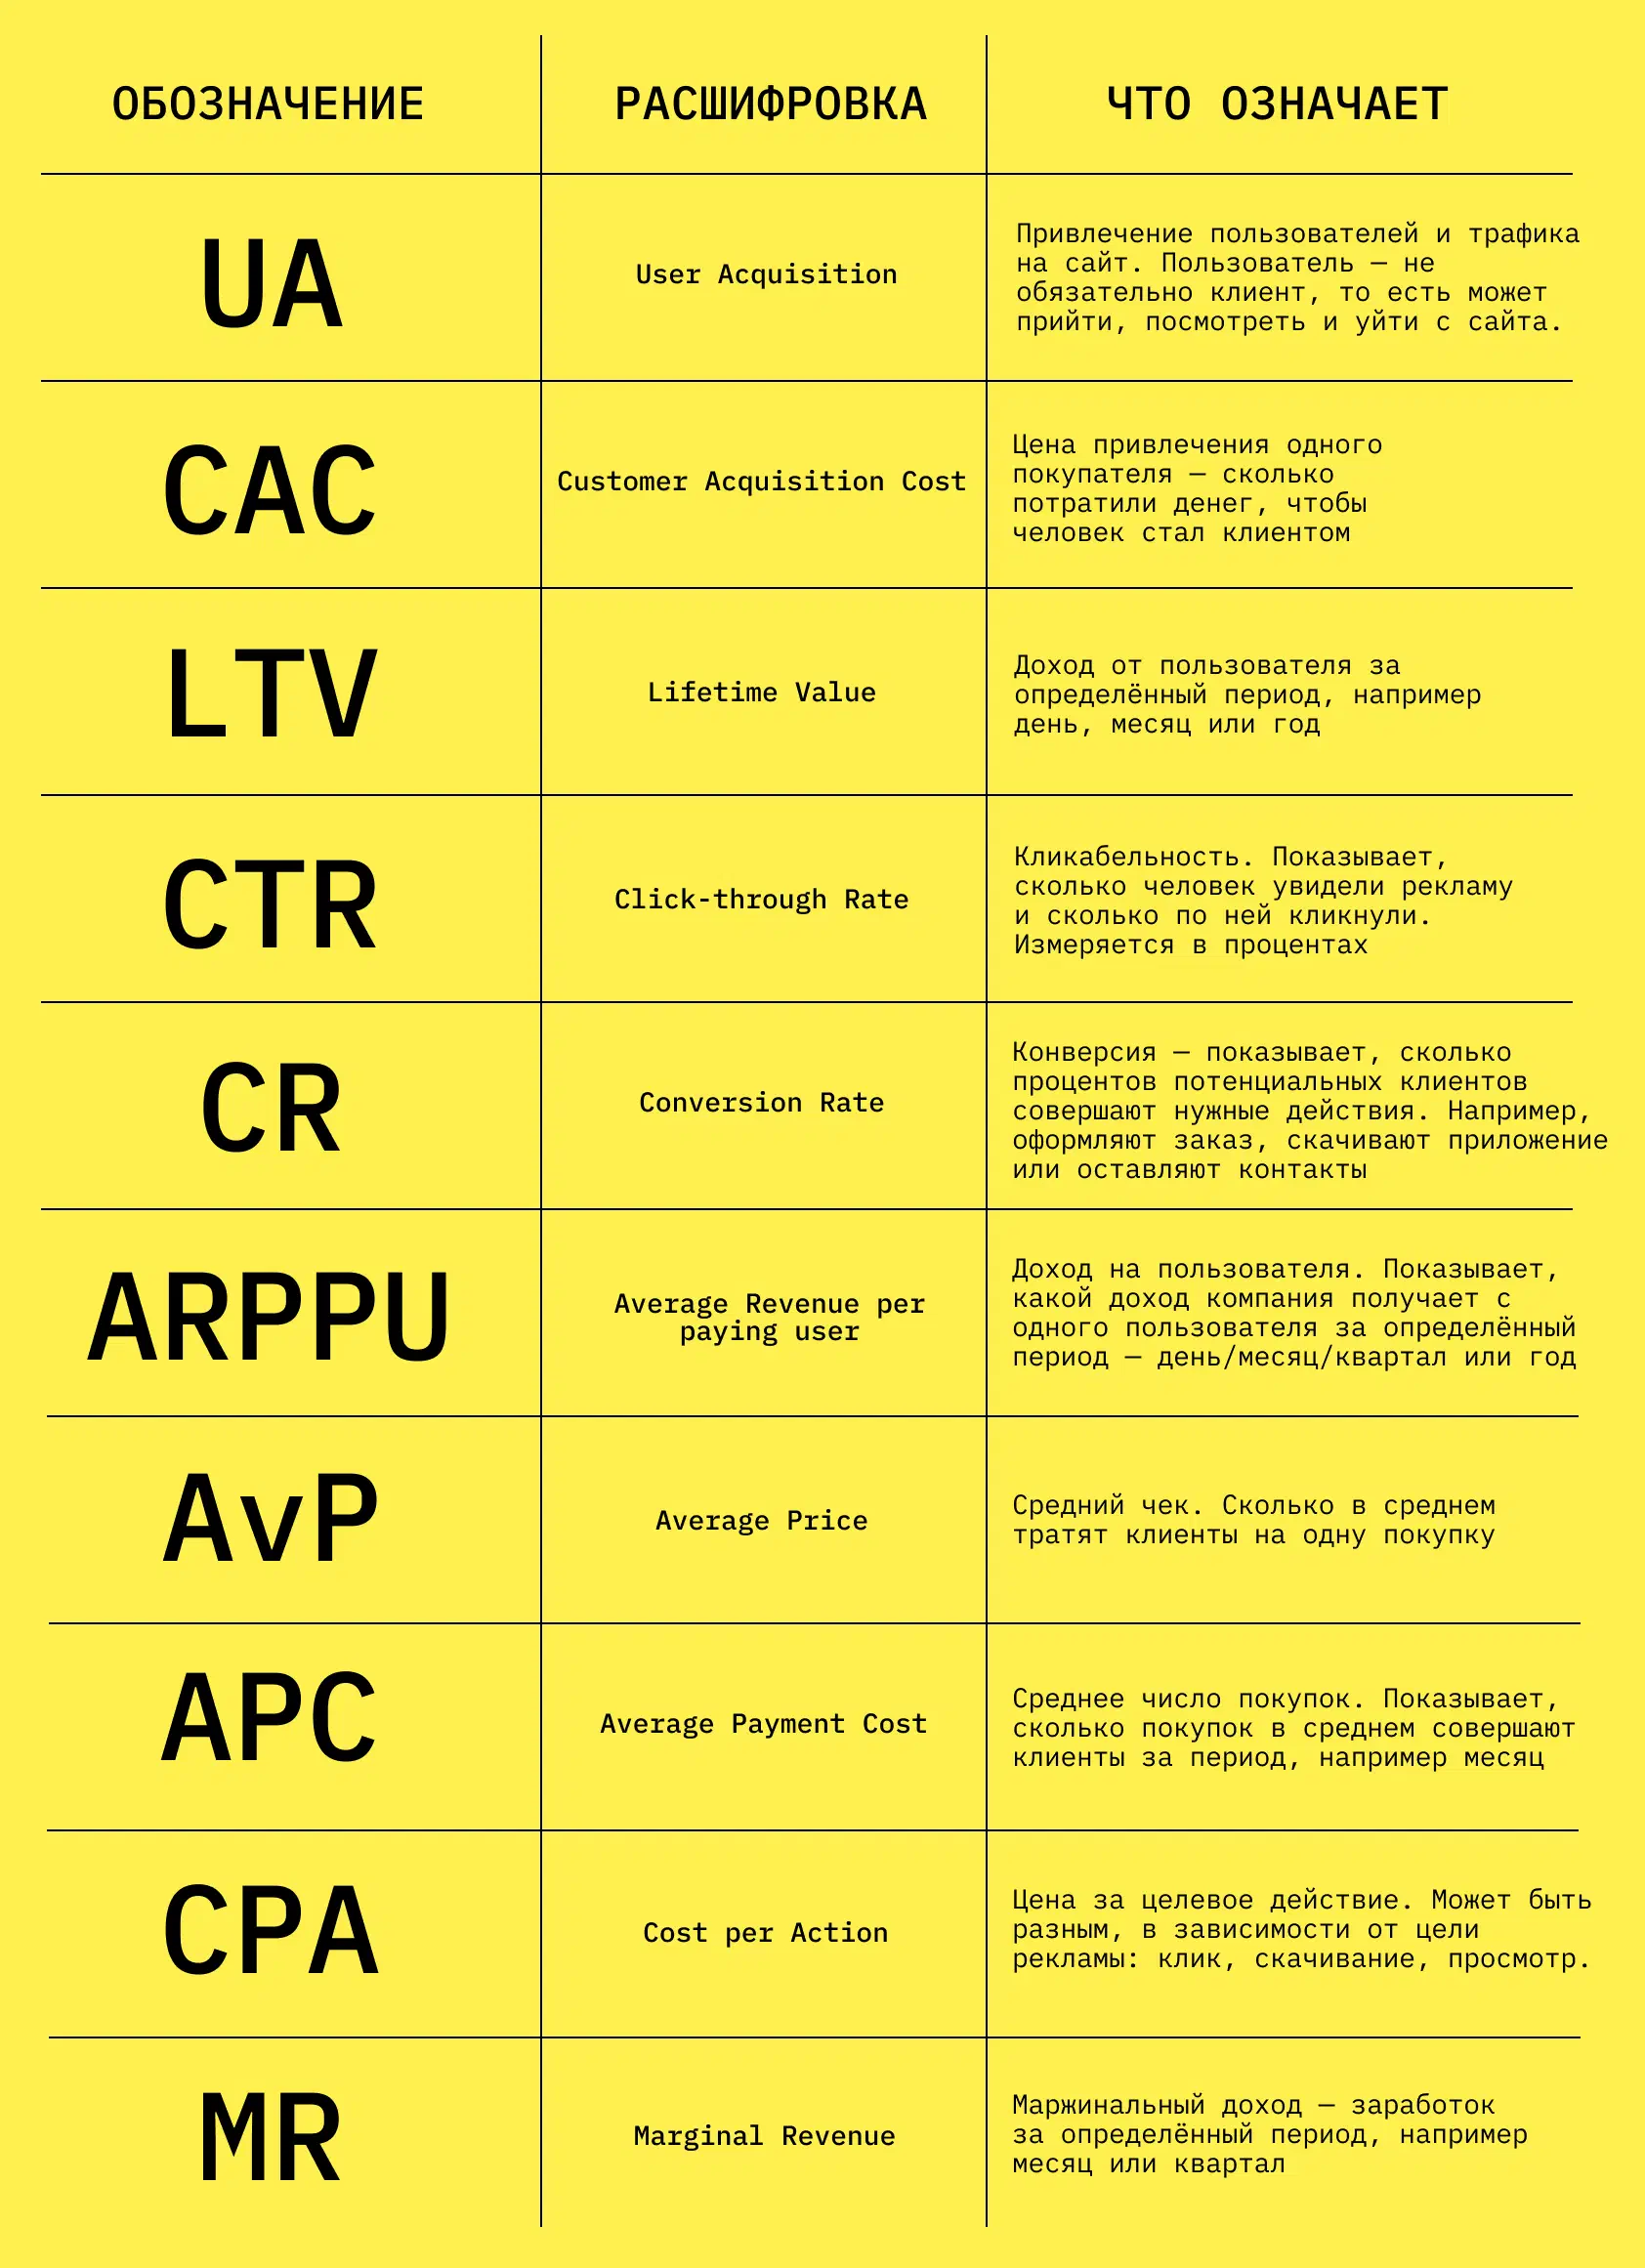

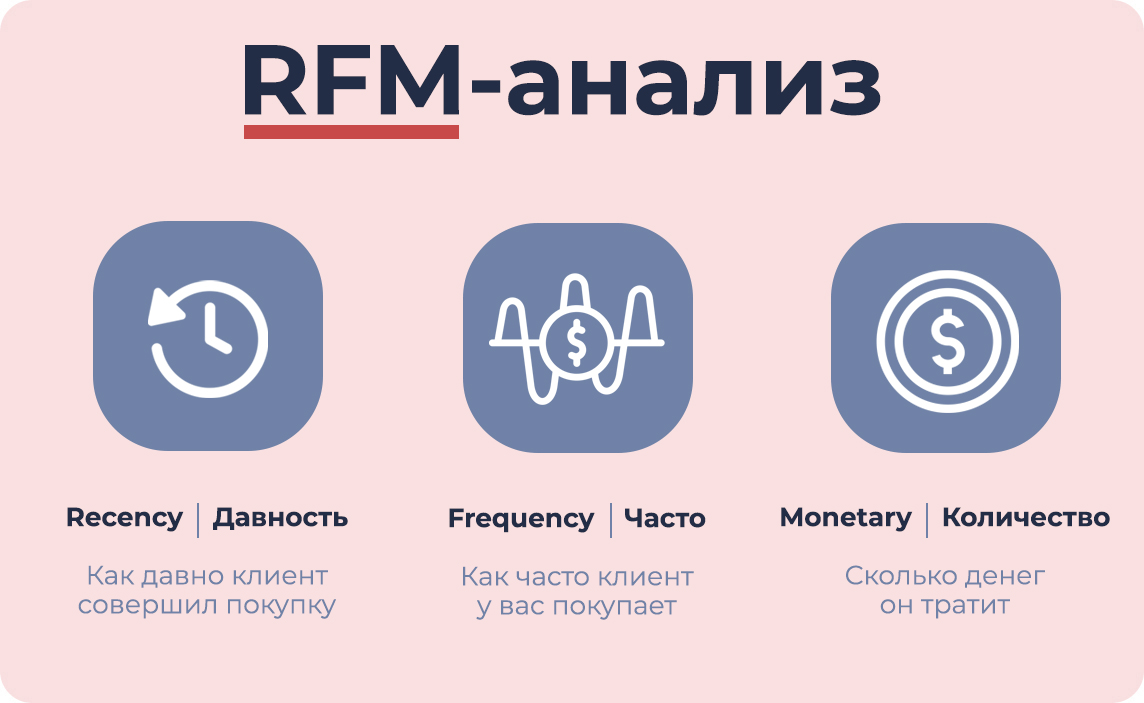

### Загружаем исходные для анализа файлы. В данном случае загружаем файлы в виртуальную машишу.

In [179]:
df = pd.read_csv('data.csv.zip', encoding='latin-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Приводим в соотвествие тип данных в колонке с датами

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [180]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Работаем с пропущенными значениями

In [ ]:
print("В наших данных {} строк и {} колонок".format(df.shape[0], df.shape[1]))

В наших данных 541909 строк и 8 колонок


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.loc[622]

,622
InvoiceNo,536414
StockCode,22139
Description,New product
Quantity,56
InvoiceDate,2010-12-01 11:52:00
UnitPrice,0.0
CustomerID,NaN
Country,United Kingdom


In [181]:
df['Description'] = df['Description'].fillna('New product')

In [182]:
df = df.dropna()

### Убеждаемся, что ID Заказчика - это INT

In [183]:
#df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))
### Как вариант -
df['CustomerID'] = df['CustomerID'].astype('int32')

In [ ]:
def toINT(x):
  return int(x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Создаем колонку с общими доходами по строке и определяем дату отчета

In [184]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [185]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [186]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days = 1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
timedelta?

### Создаем агрегаты по каждой метрике

In [187]:
data_process = df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalSum'  : 'sum'
})

In [ ]:
data_process.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


In [188]:
data_process.rename(columns={
    'InvoiceDate':'Recency',
    'InvoiceNo' : 'Frequency',
    'TotalSum' : 'Monetary'
}, inplace=True)

In [ ]:
data_process.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


### Графики распределения по каждой метрике

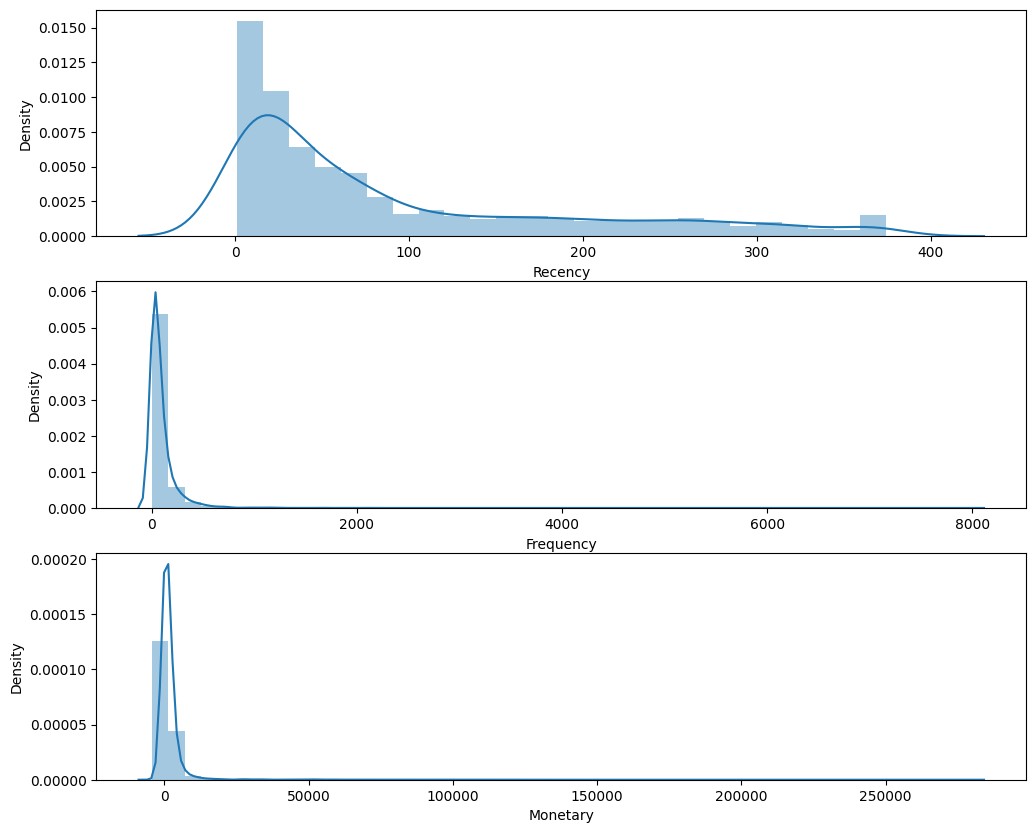

In [189]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1); sns.distplot(data_process['Recency'])
plt.subplot(3,1,2); sns.distplot(data_process['Frequency'])
plt.subplot(3,1,3); sns.distplot(data_process['Monetary'])
plt.show()

### Сглаживаем распределение

In [190]:
data_process['Recency_log'] = np.where(data_process['Recency'] == 0, 0, np.log(data_process['Recency']))
data_process['Frequency_log'] = np.where(data_process['Frequency'] == 0, 0, np.log(data_process['Frequency']))
data_process['Monetary_log'] = np.where(data_process['Monetary'] == 0, 0, np.log(data_process['Monetary']))

In [191]:
data_process.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346,326,2,0.00,5.786897,0.693147,0.000000
12347,2,182,4310.00,0.693147,5.204007,8.368693
12348,75,31,1797.24,4.317488,3.433987,7.494007
12349,19,73,1757.55,2.944439,4.290459,7.471676
12350,310,17,334.40,5.736572,2.833213,5.812338


<Axes: xlabel='Monetary_log', ylabel='Density'>

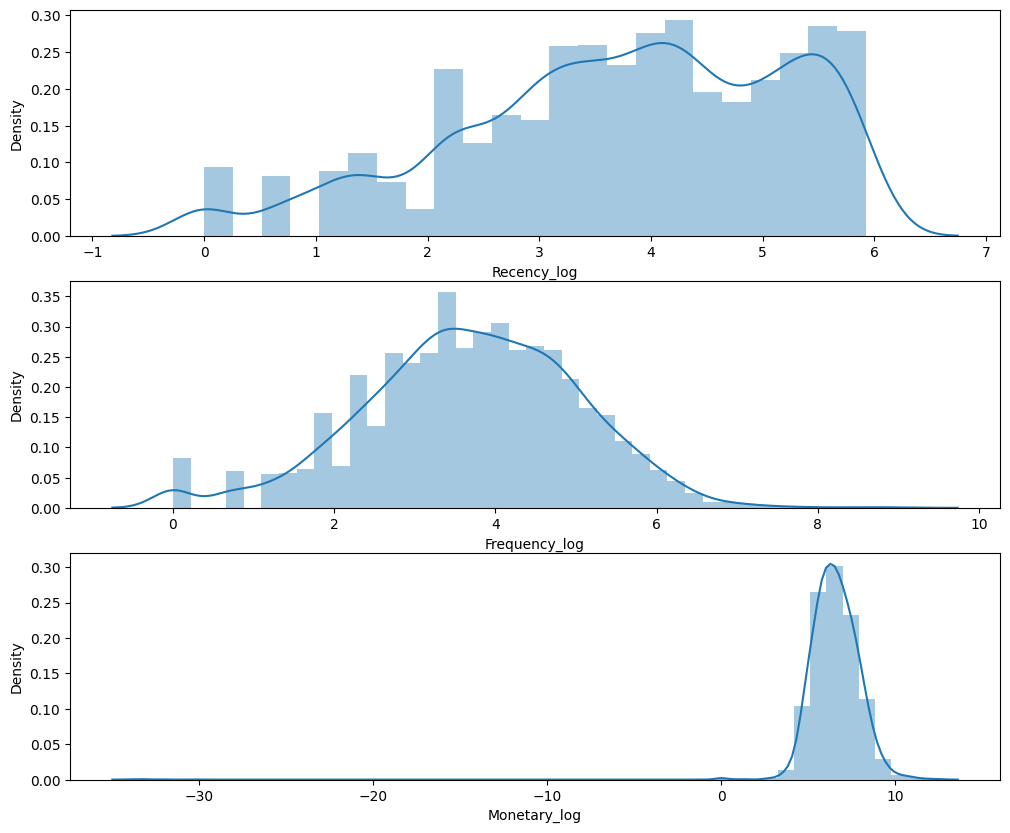

In [192]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1); sns.distplot(data_process['Recency_log'])
plt.subplot(3,1,2); sns.distplot(data_process['Frequency_log'])
plt.subplot(3,1,3); sns.distplot(data_process['Monetary_log'])

### Создаем классы для сегментации по каждой метрике

In [193]:
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

### pd.qcut

r_groups = pd.cut(data_process['Recency_log'], bins = 5, labels=r_labels)
f_groups = pd.cut(data_process['Frequency_log'], bins = 5, labels=f_labels)
m_groups = pd.cut(data_process['Monetary_log'], bins = 5, labels=m_labels)

data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [194]:
data_process.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
CustomerID,,,,,,,,,
12346,326,2,0.00,5.786897,0.693147,0.000000,1,1,4
12347,2,182,4310.00,0.693147,5.204007,8.368693,5,3,5
12348,75,31,1797.24,4.317488,3.433987,7.494007,2,2,5
12349,19,73,1757.55,2.944439,4.290459,7.471676,3,3,5
12350,310,17,334.40,5.736572,2.833213,5.812338,1,2,5


### Рисуем тепловую карту

In [205]:
rfm_table = data_process.pivot_table(
    index = 'F',
    columns = 'R',
    values = 'Monetary',
    aggfunc = np.mean
)#.applymap(float)

In [206]:
rfm_table

R,5,4,3,2,1
F,,,,,
1,803.783333,163.396667,491.790189,347.128804,164.980502
2,1144.931471,699.561546,533.674862,561.332700,400.433104
3,3009.299097,2732.212447,1717.529153,1454.838509,1004.358917
4,11338.215376,9043.992455,5964.687687,4298.574082,2334.702857
5,74256.677778,63430.496667,NaN,NaN,NaN


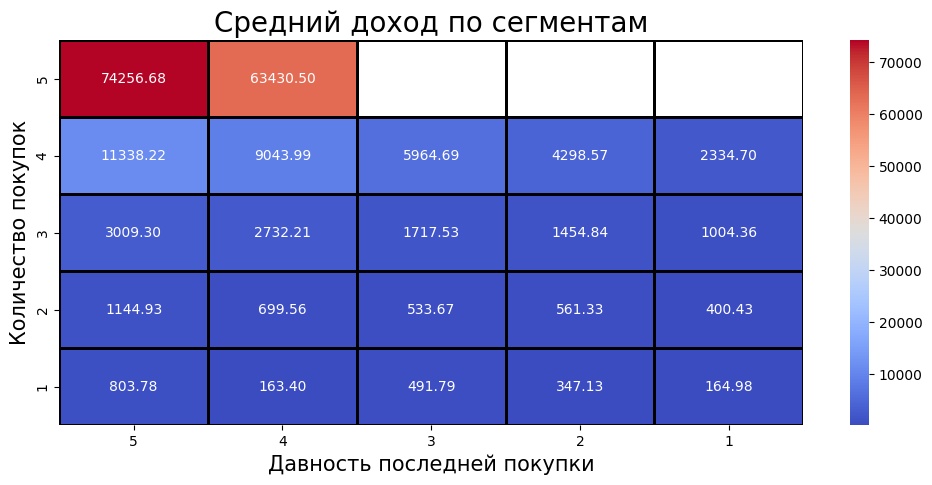

In [209]:
# rfm_table = data_process.pivot_table(
#     index = 'F',
#     columns = 'R',
#     values = 'Monetary',
#     aggfunc = np.mean
# )#.applymap(float)


plt.figure(figsize = (12,5))
sns.heatmap(rfm_table, annot = True, fmt = "0.2f", linewidths = 1, linecolor = 'black', cmap = 'coolwarm')
plt.title("Средний доход по сегментам", fontsize = 20, color = 'black')
plt.xlabel('Давность последней покупки', fontsize = 15, color = 'black')
plt.ylabel('Количество покупок', fontsize = 15, color = 'black')

#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

### Понятные классы для каждой метрики

In [197]:
segm_map = {
    r'[1-2][1-2]' : 'в зоне бездействия',
    r'[1-2][3-4]' : 'в зоне риска',
    r'[1-2]5' : 'не можем потерять',
    r'3[1-2]' : 'засыпающий',
    r'33' : 'нуждающийся во внимании',
    r'[3-4][4-5]' : 'постоянный покупатель',
    r'41' : 'перспективный пользователь',
    r'51' : 'последний пользователь',
    r'[4-5][2-3]' : 'потенциальный лоялист',
    r'5[4-5]' : 'чемпион',
}

data_process['Segment'] = data_process['R'].astype(str) + data_process['F'].astype(str)
data_process['Segment'] = data_process['Segment'].replace(segm_map, regex = True)

In [198]:
data_process.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,Segment
CustomerID,,,,,,,,,,
12346,326,2,0.00,5.786897,0.693147,0.000000,1,1,4,в зоне бездействия
12347,2,182,4310.00,0.693147,5.204007,8.368693,5,3,5,потенциальный лоялист
12348,75,31,1797.24,4.317488,3.433987,7.494007,2,2,5,в зоне бездействия
12349,19,73,1757.55,2.944439,4.290459,7.471676,3,3,5,нуждающийся во внимании
12350,310,17,334.40,5.736572,2.833213,5.812338,1,2,5,в зоне бездействия


In [203]:
data_process[data_process.Segment == 'последний пользователь']

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,Segment
CustomerID,,,,,,,,,,
13298,1,2,360.0,0.000000,0.693147,5.886104,5,1,5,последний пользователь
14520,2,4,270.6,0.693147,1.386294,5.600642,5,1,5,последний пользователь
15195,3,1,3861.0,1.098612,0.000000,8.258681,5,1,5,последний пользователь
16446,1,4,2.9,0.000000,1.386294,1.064711,5,1,4,последний пользователь
16569,3,5,124.2,1.098612,1.609438,4.821893,5,1,5,последний пользователь
18273,2,3,204.0,0.693147,1.098612,5.318120,5,1,5,последний пользователь


In [202]:
frm_level_agg = data_process.groupby('Segment').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean','count']
})#.round(1)

frm_level_agg.columns = frm_level_agg.columns.droplevel()
frm_level_agg.columns = ['Ср_дней_с_посл_покуп','Ср_колво_покупок','Ср_выручка','Колво_человек']
frm_level_agg.sort_values(by='Колво_человек',ascending=False)

,Ср_дней_с_посл_покуп,Ср_колво_покупок,Ср_выручка,Колво_человек
Segment,,,,
в зоне бездействия,170.979657,16.238398,419.156734,1573
в зоне риска,110.816770,94.689441,1459.498945,966
нуждающийся во внимании,21.753820,99.252971,1717.529153,589
потенциальный лоялист,5.396127,87.813380,2365.687342,568
засыпающий,22.169935,18.294118,526.420327,306
постоянный покупатель,13.995951,430.348178,8034.003279,247
чемпион,1.784314,681.500000,16889.844412,102
перспективный пользователь,7.800000,3.466667,163.396667,15
последний пользователь,2.000000,3.166667,803.783333,6
